# Proyek Analisis Data: Global Inflation Analysis

*   **Nama:** Riza Nursyah
*   **Email:** rizanursyah02@gmail.com
*   **Instansi:** Universitas Muhammadiyah Sukabumi
*   **Prodi:** Teknik Informatika

# Beberapa Hal yang Akan di Analisis:


*   Analisis Perbandingan Tingkat Inflasi Antar Negara
*   Tren Inflasi Seiring Waktu
*   Tren Inflasi Seiring Waktu di Setiap Negara



# Import Package/Library yang Akan Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Global-Inflation-Analysis/main/global_inflation_data.csv')
df.head()

country_name                                   indicator_name  1980  1981  \
0  Afghanistan  Annual average inflation (consumer prices) rate  13.4  22.2   
1      Albania  Annual average inflation (consumer prices) rate   NaN   NaN   
2      Algeria  Annual average inflation (consumer prices) rate   9.7  14.6   
3      Andorra  Annual average inflation (consumer prices) rate   NaN   NaN   
4       Angola  Annual average inflation (consumer prices) rate  46.7   1.4   

   1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  2019  \
0  18.2  15.9  20.4   8.7  -2.1  18.4  ... -0.66   4.38   4.98   0.63   2.3   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.90   1.30   2.00   2.00   1.4   
2   6.6   7.8   6.3  10.4  14.0   5.9  ...  4.80   6.40   5.60   4.30   2.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.10  -0.40   2.60   1.00   0.5   
4   1.8   1.8   1.8   1.8   1.8   1.8  ...  9.20  30.70  29.80  19.60  17.1   

    2020   2021   2022  2023  2024  
0   5.44   5.06  13.71   9.1   NaN  
1   1.60   2.00   6.70   4.8   4.0  
2   2.40   7.20   9.30   9.0   6.8  
3   0.10   1.70   6.20   5.2   3.5  
4  22.30  25.80  21.40  13.1  22.3  

[5 rows x 47 columns]

## Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    196 non-null    object 
 1   indicator_name  196 non-null    object 
 2   1980            140 non-null    float64
 3   1981            144 non-null    float64
 4   1982            145 non-null    float64
 5   1983            145 non-null    float64
 6   1984            145 non-null    float64
 7   1985            145 non-null    float64
 8   1986            145 non-null    float64
 9   1987            147 non-null    float64
 10  1988            147 non-null    float64
 11  1989            147 non-null    float64
 12  1990            150 non-null    float64
 13  1991            155 non-null    float64
 14  1992            158 non-null    float64
 15  1993            169 non-null    float64
 16  1994            171 non-null    float64
 17  1995            172 non-null    flo

In [4]:
df.isna().sum()

country_name       0
indicator_name     0
1980              56
1981              52
1982              51
1983              51
1984              51
1985              51
1986              51
1987              49
1988              49
1989              49
1990              46
1991              41
1992              38
1993              27
1994              25
1995              24
1996              20
1997              17
1998              15
1999              14
2000              13
2001               9
2002               7
2003               6
2004               5
2005               3
2006               3
2007               3
2008               3
2009               3
2010               3
2011               4
2012               3
2013               2
2014               2
2015               2
2016               2
2017               1
2018               1
2019               1
2020               2
2021               2
2022               2
2023               4
2024               5
dtype: int64

In [5]:
print('Jumlah Duplikasi', df.duplicated().sum())

Jumlah Duplikasi 0


In [6]:
df.describe()

1980        1981        1982        1983         1984  \
count  140.000000  144.000000  145.000000  145.000000   145.000000   
mean    21.757143   17.796528   17.029655   19.177241    26.979310   
std     33.656118   18.992691   22.797064   34.806824   111.889811   
min     -7.300000    0.000000   -0.900000   -8.500000    -7.400000   
25%      9.550000    8.600000    6.100000    5.000000     3.800000   
50%     13.850000   12.500000   10.300000    8.700000     8.000000   
75%     20.525000   19.800000   16.700000   16.000000    17.100000   
max    316.600000  116.800000  123.600000  275.600000  1281.300000   

               1985        1986          1987         1988         1989  ...  \
count    145.000000  145.000000    147.000000   147.000000   147.000000  ...   
mean     103.215172   25.262069    111.294558    58.635374   101.246259  ...   
std      975.748316   86.931210   1081.094434   400.370989   679.792142  ...   
min      -16.000000  -17.600000    -31.200000   -13.000000    -9.600000  ...   
25%        2.800000    1.800000      2.150000     2.550000     3.350000  ...   
50%        7.100000    5.800000      5.900000     6.800000     6.900000  ...   
75%       16.800000   18.200000     16.650000    17.800000    16.700000  ...   
max    11749.600000  885.200000  13109.500000  4775.200000  7428.700000  ...   

             2015        2016        2017          2018          2019  \
count  194.000000  194.000000  195.000000    195.000000    195.000000   
mean     4.116186    6.594742    7.656821    339.688359    107.294872   
std     10.763149   31.096216   34.954954   4681.227548   1425.256254   
min     -3.800000   -5.600000  -13.300000    -44.400000     -3.200000   
25%      0.100000    0.100000    1.150000      1.300000      0.800000   
50%      1.500000    1.500000    2.400000      2.500000      2.200000   
75%      4.800000    5.125000    5.200000      4.300000      4.000000   
max    121.700000  346.100000  438.100000  65374.100000  19906.000000   

              2020         2021        2022        2023        2024  
count   194.000000   194.000000  194.000000  192.000000  191.000000  
mean     19.832680    16.577629   13.616031   13.736458    9.309424  
std     173.722612   117.154632   25.282229   39.667874   25.195589  
min      -2.600000    -3.000000   -3.200000   -0.800000    1.200000  
25%       0.400000     1.925000    5.500000    4.000000    2.800000  
50%       1.900000     3.500000    8.100000    5.800000    4.000000  
75%       4.575000     5.975000   11.975000    9.925000    5.800000  
max    2355.100000  1588.500000  193.400000  360.000000  222.400000  

[8 rows x 45 columns]

## Cleaning Data

In [7]:
# menghilangkan nilai NaN
df.dropna()

country_name                                   indicator_name  \
2                Algeria  Annual average inflation (consumer prices) rate   
4                 Angola  Annual average inflation (consumer prices) rate   
5    Antigua and Barbuda  Annual average inflation (consumer prices) rate   
9              Australia  Annual average inflation (consumer prices) rate   
10               Austria  Annual average inflation (consumer prices) rate   
..                   ...                                              ...   
187              Uruguay  Annual average inflation (consumer prices) rate   
189              Vanuatu  Annual average inflation (consumer prices) rate   
190            Venezuela  Annual average inflation (consumer prices) rate   
191              Vietnam  Annual average inflation (consumer prices) rate   
194               Zambia  Annual average inflation (consumer prices) rate   

     1980  1981  1982  1983  1984  1985   1986   1987  ...   2015   2016  \
2     9.7  14.6   6.6   7.8   6.3  10.4   14.0    5.9  ...    4.8    6.4   
4    46.7   1.4   1.8   1.8   1.8   1.8    1.8    1.8  ...    9.2   30.7   
5    19.0  11.5   4.2   2.3   3.8   1.0    0.5    3.6  ...    1.0   -0.5   
9    10.1   9.5  11.4  10.0   4.0   6.7    9.1    8.5  ...    1.5    1.3   
10    6.3   6.8   5.4   3.3   5.7   3.2    1.7    1.4  ...    0.8    1.0   
..    ...   ...   ...   ...   ...   ...    ...    ...  ...    ...    ...   
187  63.5  34.0  19.0  49.2  55.3  72.2   76.4   63.6  ...    8.7    9.6   
189  11.2  26.8   6.7   1.7   5.5   1.1    4.8   16.0  ...    2.5    0.8   
190  21.4  16.2   9.6   6.2  12.2  11.4   11.5   28.1  ...  121.7  254.9   
191  25.2  69.6  95.4  49.5  64.9  91.6  453.5  360.4  ...    0.6    2.7   
194  11.7  14.0  12.5  19.7  20.0  37.4   48.0   43.0  ...   10.1   17.9   

      2017     2018     2019    2020    2021   2022   2023   2024  
2      5.6      4.3      2.0     2.4     7.2    9.3    9.0    6.8  
4     29.8     19.6     17.1    22.3    25.8   21.4   13.1   22.3  
5      2.4      1.2      1.4     1.1     1.6    7.5    5.0    2.9  
9      2.0      1.9      1.6     0.9     2.8    6.6    5.8    4.0  
10     2.2      2.1      1.5     1.4     2.8    8.6    7.8    3.7  
..     ...      ...      ...     ...     ...    ...    ...    ...  
187    6.2      7.6      7.9     9.8     7.7    9.1    6.1    5.9  
189    3.1      2.4      2.7     5.3     2.3    7.0    9.3    5.7  
190  438.1  65374.1  19906.0  2355.1  1588.5  186.5  360.0  200.0  
191    3.5      3.5      2.8     3.2     1.8    3.2    3.4    3.4  
194    6.6      7.5      9.2    15.7    22.0   11.0   10.6    9.6  

[136 rows x 47 columns]

# Exploratory Data Analysis

## Analisis Perbandingan Tingkat Inflasi Antar Negara

In [8]:
mean_inflation_by_country = df.groupby('country_name').mean(numeric_only=True).reset_index()
mean_inflation_by_country = mean_inflation_by_country.sort_values(by='2024', ascending=False)
top_10_countries = mean_inflation_by_country.head(10)

<ipython-input-9-3f319ce0b6c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='2024', y='country_name', palette='viridis')


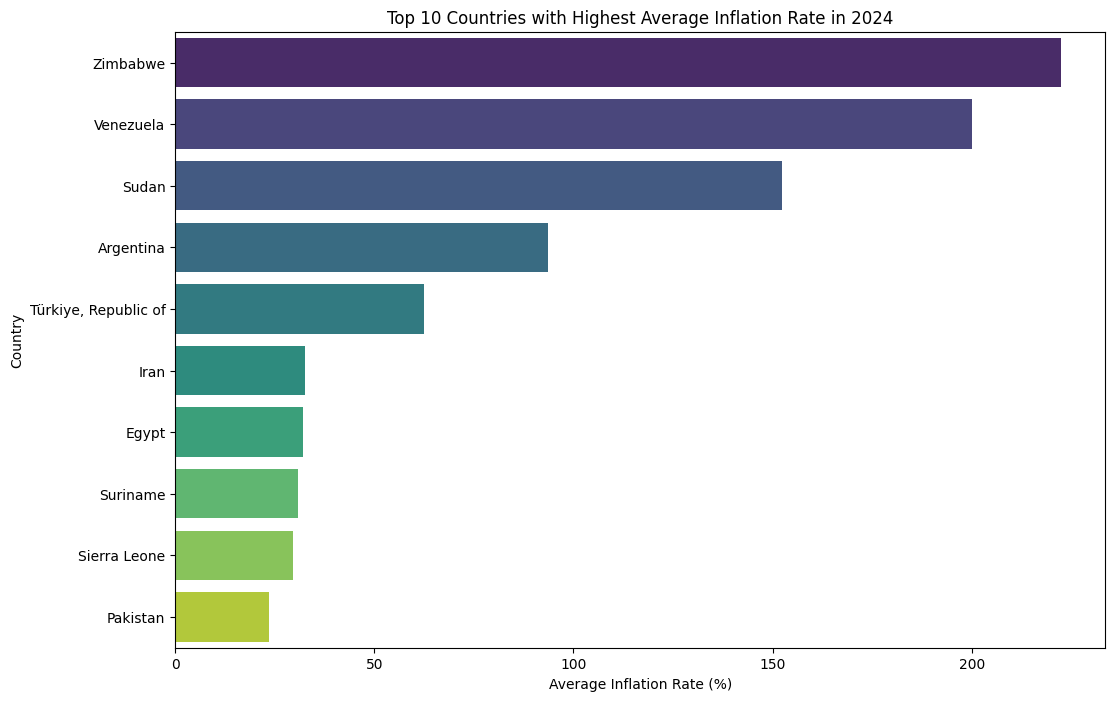

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_countries, x='2024', y='country_name', palette='viridis')
plt.title('Top 10 Countries with Highest Average Inflation Rate in 2024')
plt.xlabel('Average Inflation Rate (%)')
plt.ylabel('Country')
plt.show()

## Tren Inflasi Global Seiring Waktu

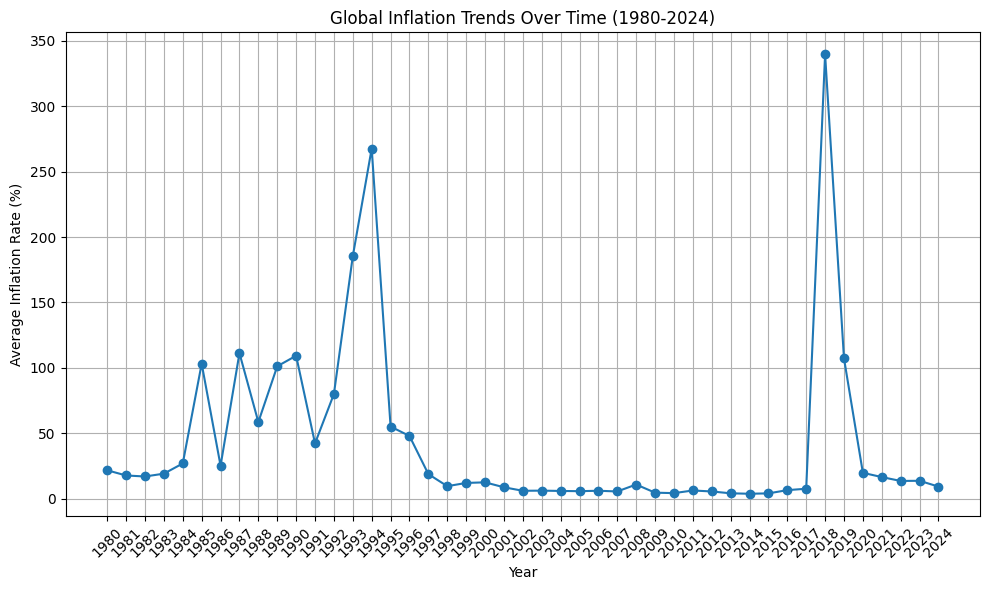

In [10]:
# Menghitung rata-rata inflasi global untuk setiap tahun
mean_inflation_by_year = df.iloc[:, 2:].mean()

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(mean_inflation_by_year.index, mean_inflation_by_year.values, marker='o', linestyle='-')
plt.title('Global Inflation Trends Over Time (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Tren Inflasi di Setiap Negara

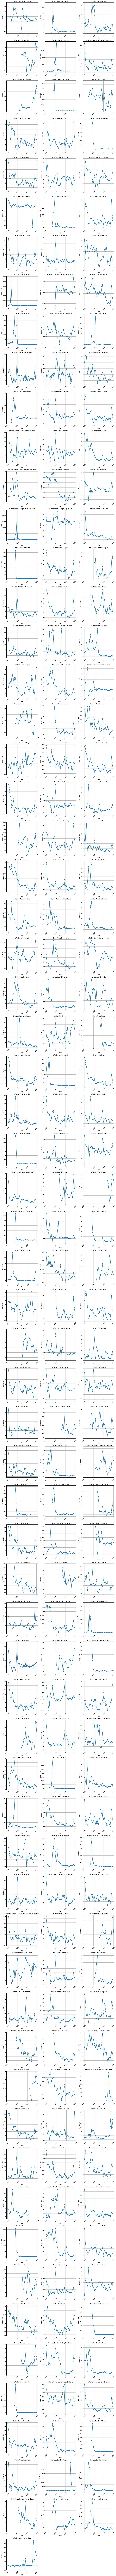

In [11]:
def plot_all_countries_inflation(df):
    # Memilih kolom tahun untuk analisis
    years = [str(year) for year in range(1980, 2025)]

    # Memilih nama-nama negara yang unik
    countries = df['country_name'].unique()

    # Menentukan ukuran subplot berdasarkan jumlah negara
    num_countries = len(countries)
    num_cols = 3  # Jumlah kolom subplot
    num_rows = (num_countries // num_cols) + (1 if num_countries % num_cols != 0 else 0)

    # Membuat subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    # Loop melalui setiap negara untuk membuat plot
    for i, country in enumerate(countries):
        # Memilih data untuk negara tertentu
        country_data = df[df['country_name'] == country]

        # Memilih data inflasi untuk negara tersebut
        inflation_data = country_data[years].iloc[0]

        # Membuat plot pada subplot yang sesuai
        axes[i].plot(years, inflation_data, marker='o', linestyle='-')
        axes[i].set_title(f'Inflation Trend in {country}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Inflation (%)')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)

        # Menyesuaikan label sumbu x
        axes[i].set_xticks(['1980', '1995', '2010', '2024'])

    # Menyembunyikan subplot yang tidak digunakan
    for j in range(num_countries, num_rows * num_cols):
        fig.delaxes(axes[j])

    # Menyesuaikan layout
    plt.tight_layout()
    plt.show()

plot_all_countries_inflation(df)